In [1]:
import boto3, re, sys, math, json, os, sagemaker
from sagemaker import get_execution_role
import numpy as np
import pandas as pd
from time import gmtime, strftime

region_name = 'us-east-1'
boto3.setup_default_session(region_name=region_name)
s3 = boto3.client('s3')
print(f"Connected to region: {region_name}")

/home/ec2-user/anaconda3/envs/pytorch_p310/lib/python3.10/site-packages/pydantic/_internal/_fields.py:172: UserWarning: Field name "json" in "MonitoringDatasetFormat" shadows an attribute in parent "Base"
  warnings.warn(


[12/30/24 05:11:06] INFO     Found credentials from IAM Role:                                   ]8;id=200636;file:///home/ec2-user/anaconda3/envs/pytorch_p310/lib/python3.10/site-packages/botocore/credentials.py\credentials.py]8;;\:]8;id=835419;file:///home/ec2-user/anaconda3/envs/pytorch_p310/lib/python3.10/site-packages/botocore/credentials.py#1075\1075]8;;\
                             BaseNotebookInstanceEc2InstanceRole                                                   

sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /home/ec2-user/.config/sagemaker/config.yaml


                    INFO     Found credentials from IAM Role:                                   ]8;id=388268;file:///home/ec2-user/anaconda3/envs/pytorch_p310/lib/python3.10/site-packages/botocore/credentials.py\credentials.py]8;;\:]8;id=81863;file:///home/ec2-user/anaconda3/envs/pytorch_p310/lib/python3.10/site-packages/botocore/credentials.py#1075\1075]8;;\
                             BaseNotebookInstanceEc2InstanceRole                                                   

Connected to region: us-east-1


In [2]:
import boto3

bucket_name = 'fifa-dataset'
region_name = 'us-east-1'
s3 = boto3.client('s3', region_name=region_name)
files = []
try:
    response = s3.list_objects_v2(Bucket=bucket_name)
    if 'Contents' in response:
        print(f"Files in {bucket_name}:")
        for obj in response['Contents']:
            files.append(obj['Key'])
            print(f" - {obj['Key']}")
    else:
        print(f"The bucket {bucket_name} is empty.")
except Exception as e:
    print(f"Error accessing bucket: {e}")

Files in fifa-dataset:
 - female_players_16.csv
 - female_players_17.csv
 - female_players_18.csv
 - female_players_19.csv
 - female_players_20.csv
 - female_players_21.csv
 - female_players_22.csv
 - players_15.csv
 - players_16.csv
 - players_17.csv
 - players_18.csv
 - players_19.csv
 - players_20.csv
 - players_21.csv
 - players_22.csv


In [3]:
files

['female_players_16.csv',
 'female_players_17.csv',
 'female_players_18.csv',
 'female_players_19.csv',
 'female_players_20.csv',
 'female_players_21.csv',
 'female_players_22.csv',
 'players_15.csv',
 'players_16.csv',
 'players_17.csv',
 'players_18.csv',
 'players_19.csv',
 'players_20.csv',
 'players_21.csv',
 'players_22.csv']

In [4]:
import boto3
import pandas as pd
from io import StringIO


bucket_name = 'fifa-dataset'
s3 = boto3.client('s3')
dfs = []

for i in range(len(files)):
    file_key = files[i]
    try:
        obj = s3.get_object(Bucket=bucket_name, Key=file_key)
        data = obj['Body'].read().decode('utf-8')
        df = pd.read_csv(StringIO(data))
        dfs.append(df)
        print(f"Loaded {file_key} with {len(df)} rows.")

    except Exception as e:
        print(f"Error loading {file_key}: {e}")
combined_df = pd.concat(dfs, ignore_index=True)
print(combined_df.head())

Loaded female_players_16.csv with 248 rows.
Loaded female_players_17.csv with 299 rows.
Loaded female_players_18.csv with 317 rows.
Loaded female_players_19.csv with 299 rows.
Loaded female_players_20.csv with 345 rows.
Loaded female_players_21.csv with 345 rows.
Loaded female_players_22.csv with 391 rows.
Error loading players_15.csv: No columns to parse from file
Error loading players_16.csv: No columns to parse from file
Error loading players_17.csv: No columns to parse from file


/tmp/ipykernel_8118/2966194119.py:15: DtypeWarning: Columns (81,82,83,84,85) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(StringIO(data))


Loaded players_18.csv with 17954 rows.
Error loading players_19.csv: No columns to parse from file
Error loading players_20.csv: No columns to parse from file
Loaded players_21.csv with 18944 rows.
Loaded players_22.csv with 19239 rows.
   sofifa_id                                         player_url  short_name  \
0     226324  https://sofifa.com/player/226324/carli-lloyd/1...    C. Lloyd   
1     226328  https://sofifa.com/player/226328/megan-rapinoe...  M. Rapinoe   
2     226334  https://sofifa.com/player/226334/abby-wambach/...  A. Wambach   
3     226362  https://sofifa.com/player/226362/louisa-necib/...    L. Nécib   
4     226373  https://sofifa.com/player/226373/nadine-kessle...   N. Keßler   

            long_name player_positions  overall  potential  value_eur  \
0  Carli Anne Hollins  CM, CAM, LM, ST       91         91        NaN   
1  Megan Anna Rapinoe           LM, CM       90         90        NaN   
2        Abby Wambach               ST       90         90        NaN

/tmp/ipykernel_8118/2966194119.py:15: DtypeWarning: Columns (25,108) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(StringIO(data))


In [5]:
combined_df.head()

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,226324,https://sofifa.com/player/226324/carli-lloyd/1...,C. Lloyd,Carli Anne Hollins,"CM, CAM, LM, ST",91,91,NaN,NaN,32,...,82+3,82+3,82+3,83+3,19+3,https://cdn.sofifa.com/players/226/324/16_120.png,NaN,NaN,https://cdn.sofifa.com/teams/113009/60.png,https://cdn.sofifa.com/flags/us.png
1,226328,https://sofifa.com/player/226328/megan-rapinoe...,M. Rapinoe,Megan Anna Rapinoe,"LM, CM",90,90,NaN,NaN,29,...,56+3,56+3,56+3,66+3,19+3,https://cdn.sofifa.com/players/226/328/16_120.png,NaN,NaN,https://cdn.sofifa.com/teams/113009/60.png,https://cdn.sofifa.com/flags/us.png
2,226334,https://sofifa.com/player/226334/abby-wambach/...,A. Wambach,Abby Wambach,ST,90,90,NaN,NaN,35,...,55+3,55+3,55+3,55+3,20+3,https://cdn.sofifa.com/players/226/334/16_120.png,NaN,NaN,https://cdn.sofifa.com/teams/113009/60.png,https://cdn.sofifa.com/flags/us.png
3,226362,https://sofifa.com/player/226362/louisa-necib/...,L. Nécib,Louisa Nécib,"LM, CAM",90,90,NaN,NaN,28,...,61+3,61+3,61+3,69+3,20+3,https://cdn.sofifa.com/players/226/362/16_120.png,NaN,NaN,https://cdn.sofifa.com/teams/113003/60.png,https://cdn.sofifa.com/flags/fr.png
4,226373,https://sofifa.com/player/226373/nadine-kessle...,N. Keßler,Nadine Keßler,CM,89,89,NaN,NaN,27,...,79+3,79+3,79+3,80+3,20+3,https://cdn.sofifa.com/players/226/373/16_120.png,NaN,NaN,https://cdn.sofifa.com/teams/113004/60.png,https://cdn.sofifa.com/flags/de.png


In [6]:
# removing N/A values
combined_df = combined_df.dropna(axis = 1)
combined_df

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,age,dob,height_cm,...,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_face_url,nation_flag_url
0,226324,https://sofifa.com/player/226324/carli-lloyd/1...,C. Lloyd,Carli Anne Hollins,"CM, CAM, LM, ST",91,91,32,1982-07-16,173,...,86+3,83+3,83+3,82+3,82+3,82+3,83+3,19+3,https://cdn.sofifa.com/players/226/324/16_120.png,https://cdn.sofifa.com/flags/us.png
1,226328,https://sofifa.com/player/226328/megan-rapinoe...,M. Rapinoe,Megan Anna Rapinoe,"LM, CM",90,90,29,1985-07-05,170,...,68+3,71+3,66+3,56+3,56+3,56+3,66+3,19+3,https://cdn.sofifa.com/players/226/328/16_120.png,https://cdn.sofifa.com/flags/us.png
2,226334,https://sofifa.com/player/226334/abby-wambach/...,A. Wambach,Abby Wambach,ST,90,90,35,1980-06-02,180,...,59+3,57+3,55+3,55+3,55+3,55+3,55+3,20+3,https://cdn.sofifa.com/players/226/334/16_120.png,https://cdn.sofifa.com/flags/us.png
3,226362,https://sofifa.com/player/226362/louisa-necib/...,L. Nécib,Louisa Nécib,"LM, CAM",90,90,28,1987-01-23,168,...,71+3,73+3,69+3,61+3,61+3,61+3,69+3,20+3,https://cdn.sofifa.com/players/226/362/16_120.png,https://cdn.sofifa.com/flags/fr.png
4,226373,https://sofifa.com/player/226373/nadine-kessle...,N. Keßler,Nadine Keßler,CM,89,89,27,1988-04-04,169,...,83+3,81+3,80+3,79+3,79+3,79+3,80+3,20+3,https://cdn.sofifa.com/players/226/373/16_120.png,https://cdn.sofifa.com/flags/de.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58376,261962,https://sofifa.com/player/261962/defu-song/220002,Song Defu,宋德福,CDM,47,52,22,1999-01-02,180,...,46+2,48+2,48+2,46+2,46+2,46+2,48+2,15+2,https://cdn.sofifa.net/players/261/962/22_120.png,https://cdn.sofifa.net/flags/cn.png
58377,262040,https://sofifa.com/player/262040/caoimhin-port...,C. Porter,Caoimhin Porter,CM,47,59,19,2002-03-18,175,...,46+2,49+2,48+2,44+2,44+2,44+2,48+2,14+2,https://cdn.sofifa.net/players/262/040/22_120.png,https://cdn.sofifa.net/flags/ie.png
58378,262760,https://sofifa.com/player/262760/nathan-logue/...,N. Logue,Nathan Logue-Cunningham,CM,47,55,21,2000-02-07,178,...,46+2,47+2,47+2,45+2,45+2,45+2,47+2,12+2,https://cdn.sofifa.net/players/262/760/22_120.png,https://cdn.sofifa.net/flags/ie.png
58379,262820,https://sofifa.com/player/262820/luke-rudden/2...,L. Rudden,Luke Rudden,ST,47,60,19,2002-04-23,173,...,29+2,33+2,32+2,26+2,26+2,26+2,32+2,15+2,https://cdn.sofifa.net/players/262/820/22_120.png,https://cdn.sofifa.net/flags/ie.png


In [7]:
# remove string for ease
combined_df = combined_df.select_dtypes(exclude=['object'])

In [8]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

print(combined_df.dtypes)

sofifa_id                      int64
overall                        int64
potential                      int64
age                            int64
height_cm                      int64
weight_kg                      int64
nationality_id                 int64
weak_foot                      int64
skill_moves                    int64
international_reputation       int64
attacking_crossing             int64
attacking_finishing            int64
attacking_heading_accuracy     int64
attacking_short_passing        int64
attacking_volleys              int64
skill_dribbling                int64
skill_curve                    int64
skill_fk_accuracy              int64
skill_long_passing             int64
skill_ball_control             int64
movement_acceleration          int64
movement_sprint_speed          int64
movement_agility               int64
movement_reactions             int64
movement_balance               int64
power_shot_power               int64
power_jumping                  int64
p

In [9]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

X = combined_df.drop(columns=['overall'])
y = combined_df['overall']
print(X.dtypes)

sofifa_id                      int64
potential                      int64
age                            int64
height_cm                      int64
weight_kg                      int64
nationality_id                 int64
weak_foot                      int64
skill_moves                    int64
international_reputation       int64
attacking_crossing             int64
attacking_finishing            int64
attacking_heading_accuracy     int64
attacking_short_passing        int64
attacking_volleys              int64
skill_dribbling                int64
skill_curve                    int64
skill_fk_accuracy              int64
skill_long_passing             int64
skill_ball_control             int64
movement_acceleration          int64
movement_sprint_speed          int64
movement_agility               int64
movement_reactions             int64
movement_balance               int64
power_shot_power               int64
power_jumping                  int64
power_stamina                  int64
p

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.dropna(axis=1))
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [12]:
X_train, y_train

(array([[ 0.30493437,  1.52008334, -1.3382675 , ..., -0.37429601,
         -0.60273593, -0.3705419 ],
        [ 1.01633364,  0.24763816, -1.3382675 , ...,  2.43412364,
          2.35384731,  2.6096121 ],
        [-1.00873396,  0.08858251,  0.58923521, ...,  2.79264529,
          3.22343062,  3.0511164 ],
        ...,
        [ 0.1659059 ,  0.24763816, -0.90993356, ..., -0.13528157,
         -0.48679149, -0.48091798],
        [ 0.54306076, -0.70669573, -0.05326569, ..., -0.37429601,
         -0.37084705, -0.14978975],
        [ 1.23323658, -0.86575138, -0.48159963, ..., -0.25478879,
         -0.13895816, -0.42572994]]),
 7030     71
 55333    59
 43830    70
 30547    65
 44365    70
          ..
 54343    60
 38158    54
 860      62
 15795    62
 56422    57
 Name: overall, Length: 46704, dtype: int64)

In [13]:
# Support Vector Regression - To predict the overall value

svr = SVR(kernel = 'rbf')
svr.fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)
mse_svr = mean_squared_error(y_test, y_pred_svr)
print(f"SVR Mean Squared Error: {mse_svr}")

SVR Mean Squared Error: 0.6570263217164622


In [14]:
from sklearn.metrics import r2_score, f1_score
r2_svr = r2_score(y_test, y_pred_svr)
print(f"SVR R² Score: {r2_svr}")

SVR R² Score: 0.987222511558215


[12/30/24 05:23:20] INFO     generated new fontManager                                         ]8;id=905868;file:///home/ec2-user/anaconda3/envs/pytorch_p310/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=114457;file:///home/ec2-user/anaconda3/envs/pytorch_p310/lib/python3.10/site-packages/matplotlib/font_manager.py#1584\1584]8;;\

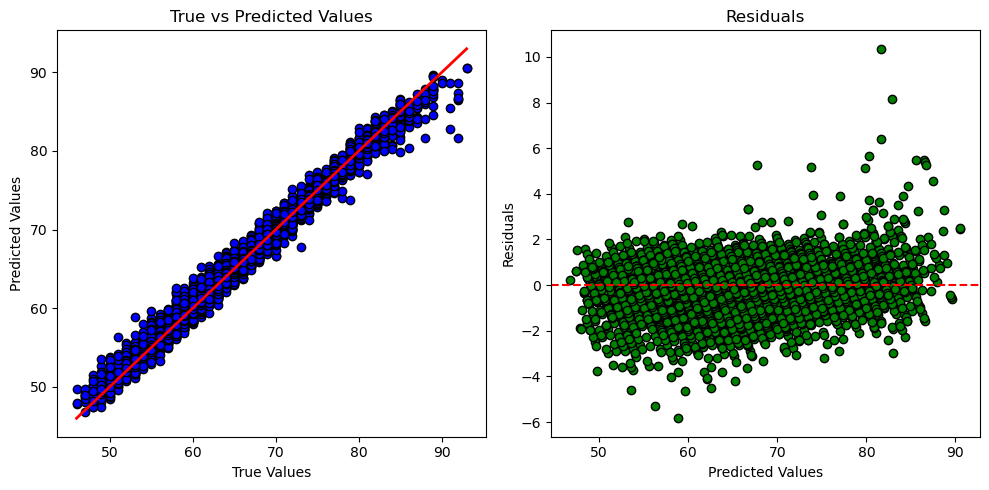

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_svr, color='blue', edgecolor='black')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)
plt.title('True vs Predicted Values')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')

# residuals (errors)
plt.subplot(1, 2, 2)
residuals = y_test - y_pred_svr
plt.scatter(y_pred_svr, residuals, color='green', edgecolor='black')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

plt.tight_layout()
plt.show()

In [17]:
# XGBoost
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 147.0 MB/s eta 0:00:00


In [18]:
import xgboost as xgb
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=0.3, learning_rate=0.1,
                          max_depth=5, alpha=10, n_estimators=10)
xg_reg.fit(X_train, y_train)
y_pred_xgb = xg_reg.predict(X_test)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
print(f"XGBoost Mean Squared Error: {mse_xgb}")

/home/ec2-user/anaconda3/envs/pytorch_p310/lib/python3.10/site-packages/xgboost/core.py:265: FutureWarning: Your system has an old version of glibc (< 2.28). We will stop supporting Linux distros with glibc older than 2.28 after **May 31, 2025**. Please upgrade to a recent Linux distro (with glibc 2.28+) to use future versions of XGBoost.
Note: You have installed the 'manylinux2014' variant of XGBoost. Certain features such as GPU algorithms or federated learning are not available. To use these features, please upgrade to a recent Linux distro with glibc 2.28+, and install the 'manylinux_2_28' variant.
  warnings.warn(


XGBoost Mean Squared Error: 12.19094536136718


In [19]:
# deep learning model simple
import torch
import torch.nn as nn
import torch.optim as optim

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

In [21]:
class NeuralNetwork(nn.Module):
    def __init__(self, input_dim):
        super(NeuralNetwork, self).__init__()
        self.hidden1 = nn.Linear(input_dim, 128)
        self.hidden2 = nn.Linear(128, 64)
        self.hidden3 = nn.Linear(64, 32)
        self.output = nn.Linear(32, 1)
    
    def forward(self, x):
        x = torch.relu(self.hidden1(x))
        x = torch.relu(self.hidden2(x))
        x = torch.relu(self.hidden3(x))
        x = self.output(x)
        return x

model = NeuralNetwork(input_dim=X_train.shape[1])
criterion = nn.MSELoss()  # Mean Squared Error loss for regression
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 2000
for epoch in range(num_epochs):
    model.train()
    
    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    
    # Backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # Print loss every 10 epochs
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# ========================================
# Evaluate the Model
# ========================================
model.eval() 
with torch.no_grad():
    y_pred_tensor = model(X_test_tensor)
    y_pred = y_pred_tensor.numpy()

# Calculate Mean Squared Error
mse_pytorch = mean_squared_error(y_test, y_pred)
print(f"PyTorch Deep Learning Model Mean Squared Error: {mse_pytorch}")

Epoch [10/2000], Loss: 4409.0156
Epoch [20/2000], Loss: 4297.8623
Epoch [30/2000], Loss: 3968.2729
Epoch [40/2000], Loss: 3173.2017
Epoch [50/2000], Loss: 1865.1603
Epoch [60/2000], Loss: 949.4102
Epoch [70/2000], Loss: 705.2677
Epoch [80/2000], Loss: 439.4630
Epoch [90/2000], Loss: 279.4369
Epoch [100/2000], Loss: 196.0185
Epoch [110/2000], Loss: 146.7893
Epoch [120/2000], Loss: 117.1536
Epoch [130/2000], Loss: 95.5091
Epoch [140/2000], Loss: 79.8603
Epoch [150/2000], Loss: 68.2673
Epoch [160/2000], Loss: 59.5685
Epoch [170/2000], Loss: 53.0795
Epoch [180/2000], Loss: 48.1624
Epoch [190/2000], Loss: 44.3945
Epoch [200/2000], Loss: 41.4408
Epoch [210/2000], Loss: 39.0600
Epoch [220/2000], Loss: 37.0841
Epoch [230/2000], Loss: 35.4027
Epoch [240/2000], Loss: 33.9420
Epoch [250/2000], Loss: 32.6509
Epoch [260/2000], Loss: 31.4955
Epoch [270/2000], Loss: 30.4508
Epoch [280/2000], Loss: 29.4969
Epoch [290/2000], Loss: 28.6201
Epoch [300/2000], Loss: 27.8034
Epoch [310/2000], Loss: 27.0319
